In [2]:
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sentence_transformers import SentenceTransformer

c:\Users\Alex\scoop\apps\python\3.12.6\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
data = pd.read_csv('personality.csv')

In [4]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embed = model.encode

In [5]:
traits = data['Persona']
from tqdm import tqdm

traits_embeds = []
for i in tqdm(range(len(traits))):
    traits_embeds.append(embed(traits[i]))


100%|██████████| 8939/8939 [06:37<00:00, 22.48it/s]


In [6]:
data['Persona Embeddings'] = traits_embeds
data.head()

,Unnamed: 0,Persona,chat,Persona Embeddings
0,0,i like to remodel homes. i like to go hunting...,"hi , how are you doing ? i am getting ready to...","[0.013096929, 0.10618845, -0.035182796, 0.0088..."
1,1,my mom is my best friend. i have four sisters...,"hi , how are you doing today ?\ni am spending ...","[-0.008305473, 0.09138587, -0.007982285, -0.00..."
2,2,i had a gig at local theater last night. i wo...,"we all live in a yellow submarine , a yellow s...","[-0.018421268, 0.056330536, -0.013345729, -0.0..."
3,3,i am very athletic. i wear contacts. i have b...,hi ! i work as a gourmet cook .\ni do not like...,"[0.029682597, 0.071247526, 0.002792256, 0.0114..."
4,4,i am primarily a meat eater. i am a guitar pl...,how are you doing today\nwhat do you do for ca...,"[-0.041024506, 0.065776296, -0.038640935, -0.0..."


In [7]:
similarity_matrix = cosine_similarity(np.stack(data['Persona Embeddings'].values))

similar_persona_dict = {}

for i in tqdm(range(len(data['Persona Embeddings']))):
    similar_persona = []
    for j in range(i + 1, len(data['Persona Embeddings'])):
        if similarity_matrix[i, j] > 0.85:
            similar_persona.append([j, data['Persona'].iloc[j]])
    similar_persona_dict[i] = similar_persona

100%|██████████| 8939/8939 [00:37<00:00, 240.47it/s] 


In [8]:
print(data['Persona'][20], '\n')
for i in similar_persona_dict[20]:
    print(i[1], sep = '\n')

 i help around with bookkeeping and tours. sometimes i volunteer at an urban farm. i am vegan. i work at the grocery store. 

 i help around with bookkeeping and tours. sometimes i volunteer at an urban farm. i decided to become vegan a year ago. i am vegan.
 i help around with bookkeeping and tours. i decided to become vegan a year ago. i am vegan. sometimes i volunteer at an urban farm. i work at the grocery store.
 i am vegan. i work at the grocery store. i help around with bookkeeping and tours. sometimes i volunteer at an urban farm.
 sometimes i volunteer at an urban farm. i work at the grocery store. i decided to become vegan a year ago. i help around with bookkeeping and tours. i am vegan.
 i am vegan. sometimes i volunteer at an urban farm. i help around with bookkeeping and tours. i work at the grocery store.
 i help around with bookkeeping and tours. i decided to become vegan a year ago. i am vegan. sometimes i volunteer at an urban farm. i work at the grocery store.
 i work

In [9]:
data['Similar'] = similar_persona_dict.values()

In [10]:
data.head()

,Unnamed: 0,Persona,chat,Persona Embeddings,Similar
0,0,i like to remodel homes. i like to go hunting...,"hi , how are you doing ? i am getting ready to...","[0.013096929, 0.10618845, -0.035182796, 0.0088...","[[195, i like to shoot a bow. i like to go sh..."
1,1,my mom is my best friend. i have four sisters...,"hi , how are you doing today ?\ni am spending ...","[-0.008305473, 0.09138587, -0.007982285, -0.00...","[[284, my mom is my best friend. i am terrifi..."
2,2,i had a gig at local theater last night. i wo...,"we all live in a yellow submarine , a yellow s...","[-0.018421268, 0.056330536, -0.013345729, -0.0...","[[406, my favorite drink is cuba libre. i did..."
3,3,i am very athletic. i wear contacts. i have b...,hi ! i work as a gourmet cook .\ni do not like...,"[0.029682597, 0.071247526, 0.002792256, 0.0114...","[[72, i have brown hair. i love bicycling. i ..."
4,4,i am primarily a meat eater. i am a guitar pl...,how are you doing today\nwhat do you do for ca...,"[-0.041024506, 0.065776296, -0.038640935, -0.0...","[[1112, my parents do not know i am gay. i am..."


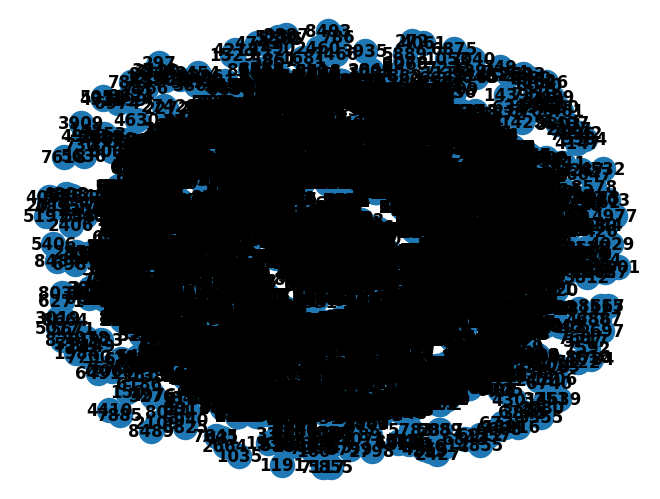

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

G = nx.Graph(name='G')

for i in range(len(data['Persona'])):
    G.add_node(i, name=i)


edges = []
for i in (range(len(data['Similar']))):
    for j in (range(len(data['Similar'][i]))):
        edges.append((i, data['Similar'][i][j][0]))

G.add_edges_from(edges)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

In [15]:
#Get the Adjacency Matrix (A) and Node Features Matrix (X) as numpy array
A = np.array(nx.attr_matrix(G, node_attr='name')[0])
X = np.array(nx.attr_matrix(G, node_attr='name')[1])
X = np.expand_dims(X,axis=1)

#print('Shape of A: ', A.shape)
#print('\nShape of X: ', X.shape)
#print('\nAdjacency Matrix (A):\n', A)
#print('\nNode Features Matrix (X):\n', X)